In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
folder_name = "Wed_Feb_21_15_56_26_2018"

In [4]:
textdata = pickle.load(open(folder_name+'/extracted_data.p','rb'))

In [5]:
year = [i.split("-")[0] for i in textdata['date']]
textdata['year'] = year

In [6]:
len(textdata['year'])

5898

# number of papers w.r.t year

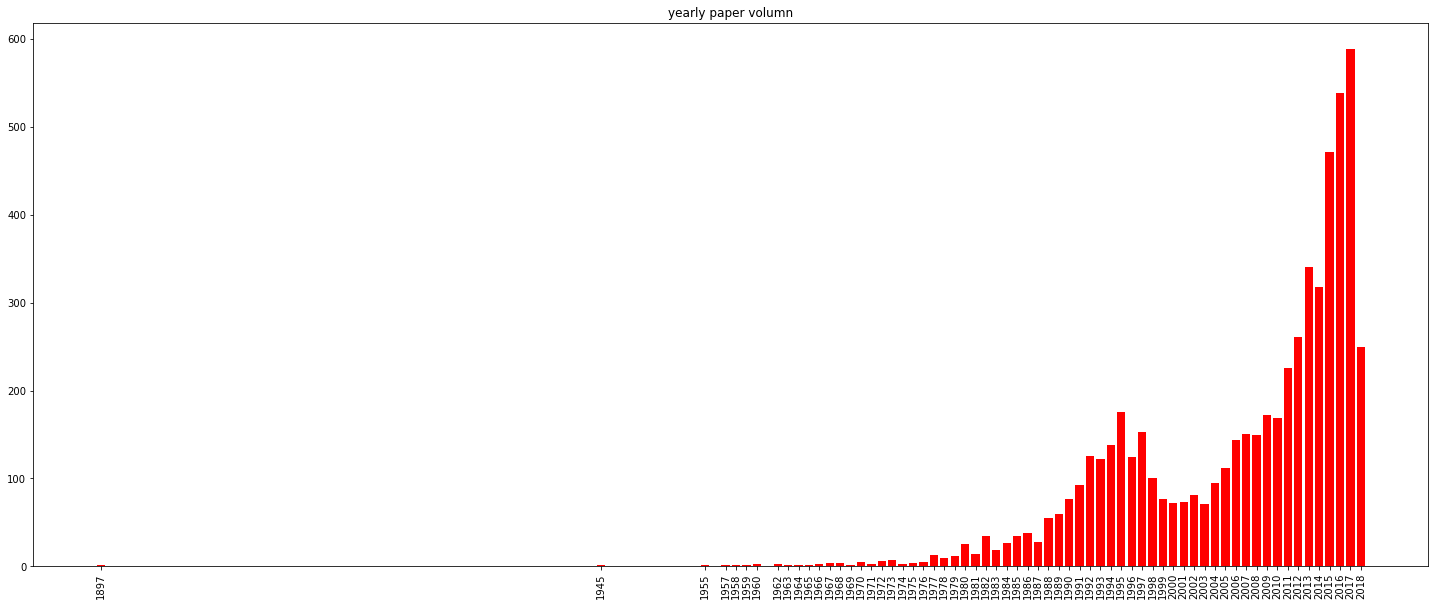

In [7]:
x1=textdata['year'].value_counts().sort_index().index
x1=[int(i) for i in x1]
y1=textdata['year'].value_counts().sort_index().values

fig, ax = plt.subplots(figsize=(25,10))
ax.bar(x1, y1, color='r')
ax.set_xticks(np.array(x1))
ax.set_xticklabels(x1,rotation=90,size=10)
ax.set_title("yearly paper volumn")
plt.show()

# number of papers w.r.t year (last 30 year)

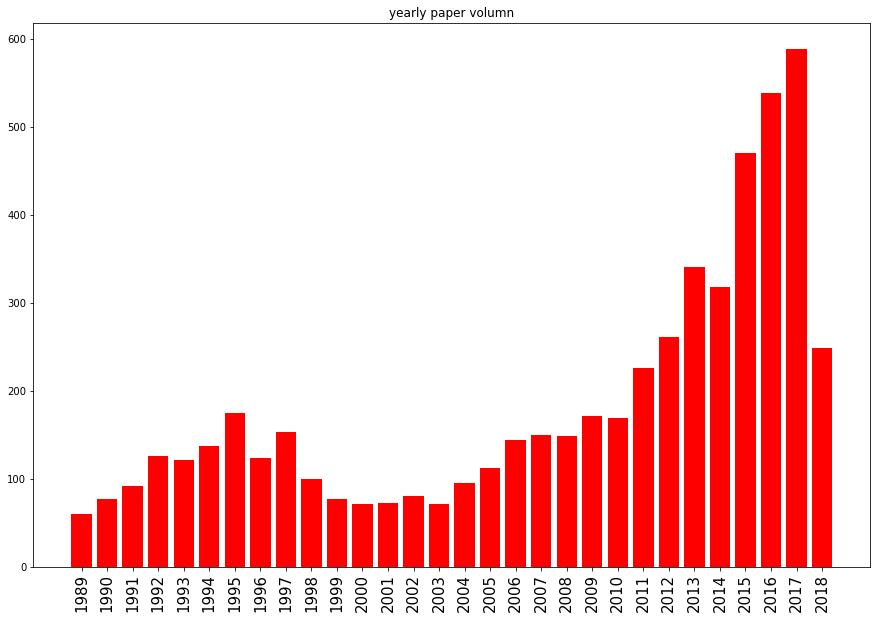

In [8]:
x1=textdata['year'].value_counts().sort_index().index[-30:]
x1=[int(i) for i in x1]
y1=textdata['year'].value_counts().sort_index().values[-30:]

fig, ax = plt.subplots(figsize=(15,10))
ax.bar(x1, y1, color='r')
ax.set_xticks(np.array(x1))
ax.set_xticklabels(x1,rotation=90,size=15)
ax.set_title("yearly paper volumn")
plt.show()

# top 15 journals w.r.t number of papers

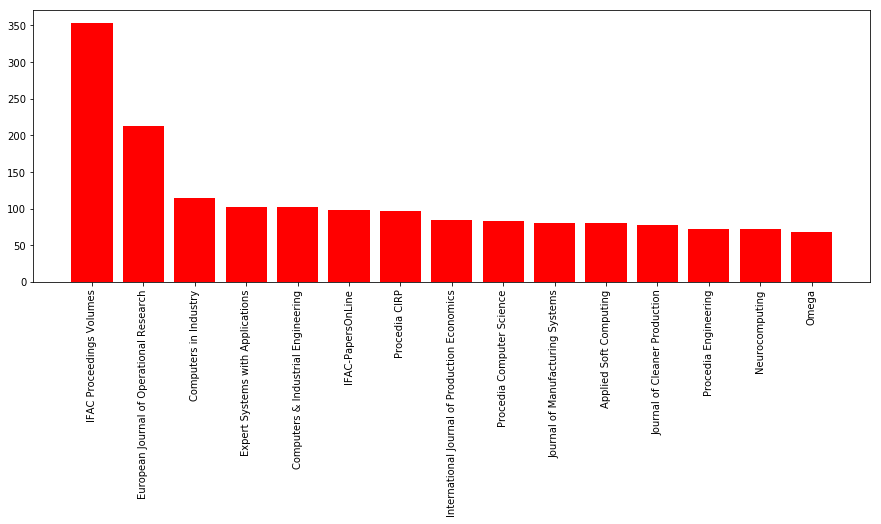

In [9]:
y1=textdata['journal_or_book_name'].value_counts().values[:15]
x1=range(len(y1))
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x1, y1, color='r')
ax.set_xticks(np.array(x1))
ax.set_xticklabels(textdata['journal_or_book_name'].value_counts()[:15].index,rotation=90,size=10)
plt.show()

# top 10 journals w.r.t total number of citations

In [10]:
temp = textdata.groupby(['journal_or_book_name'])['citation_count'].mean()
temp = pd.DataFrame(temp.sort_values(ascending=0))
temp[:10]

,citation_count
journal_or_book_name,
Advanced Drug Delivery Reviews,600.000000
Handbook of Labor Economics,492.000000
Computer Networks,443.218750
The Journal of Logic Programming,411.500000
Library & Information Science Research,365.000000
Pharmacology & Therapeutics,319.000000
Progress in Energy and Combustion Science,284.000000
Journal of Management,247.000000
Biophysical Journal,240.000000


# top 10 journals w.r.t average number of citations

In [11]:
temp = textdata.groupby(['journal_or_book_name'])['citation_count'].sum()
temp = pd.DataFrame(temp.sort_values(ascending=0))
temp[:10]

,citation_count
journal_or_book_name,
Computer Networks,14183.0
European Journal of Operational Research,8400.0
CIRP Annals,3951.0
Computer-Aided Design,3614.0
Artificial Intelligence,3418.0
Research Policy,3362.0
Mechanical Systems and Signal Processing,2857.0
Automatica,2816.0
Computers in Industry,2621.0


In [12]:
authors = {}
for idx,author_list in enumerate(textdata['authors']):
    for author in author_list:
        if author in authors:
            if len(author)>1:
                authors[author]['num_papers']+=1
                authors[author]['total_citations']+=textdata['citation_count'][idx]
                if textdata['citation_count'][idx]>authors[author]['citation']:
                    authors[author]['most_cited_paper'] = textdata['title'][idx]
        else:
            if len(author)>1:
                authors[author] = {'num_papers':1,'total_citations':textdata['citation_count'][idx],\
                                   "most_cited_paper":textdata['title'][idx],'citation':textdata['citation_count'][idx]}
authors = pd.DataFrame(authors).T

In [13]:
authors['mean_citations'] = authors['total_citations']/authors['num_papers']

# top 10 authors w.r.t total numebr of papers

In [14]:
authors.sort_values(['num_papers'],ascending=0)[:10]

,citation,most_cited_paper,num_papers,total_citations,mean_citations
"Lewis, Frank L.",4,Optimal model-free output synchronization of h...,14,564,40.2857
"Nof, Shimon Y.",2,Systematic resolution of conflict situations i...,12,87,7.25
"Govindan, Kannan",4,Application of a novel PROMETHEE-based method ...,11,729,66.2727
"Dolgui, Alexandre",0,Disruption-driven supply chain (re)-planning a...,10,267,26.7
"Gunasekaran, Angappa",11,Big data analytics and firm performance: Effec...,8,109,13.625
"Monostori, L.",0,Stochastic Dynamic Production Control by Neuro...,8,110,13.75
"Valckenaers, Paul",0,MAS coordination and control based on stigmergy,8,179,22.375
"Tao, Fei",3,A Ranking Chaos Algorithm for dual scheduling ...,7,220,31.4286
"Xu, Jiuping",0,Integrated technological paradigm-based soft p...,7,147,21
"Panetto, Hervé",169,Enterprise integration and interoperability in...,6,203,33.8333


# top 10 authors w.r.t total numebr of citations

In [15]:
authors.sort_values(['total_citations'],ascending=0)[:10]

,citation,most_cited_paper,num_papers,total_citations,mean_citations
"Cayirci, E.",10118,Wireless sensor networks: a survey,1,10118,10118
"Sankarasubramaniam, Y.",10118,Wireless sensor networks: a survey,1,10118,10118
"Su, W.",10118,Wireless sensor networks: a survey,1,10118,10118
"Akyildiz, I.F.",10118,Wireless sensor networks: a survey,1,10118,10118
"Lin, Daming",1820,A review on machinery diagnostics and prognost...,1,1820,1820
"Banjevic, Dragan",1820,A review on machinery diagnostics and prognost...,1,1820,1820
"Jardine, Andrew K.S.",1820,A review on machinery diagnostics and prognost...,1,1820,1820
"Chowdhury, Kaushik R.",1515,A survey on wireless multimedia sensor networks,1,1515,1515
"Akyildiz, Ian F.",1515,A survey on wireless multimedia sensor networks,1,1515,1515
"Melodia, Tommaso",1515,A survey on wireless multimedia sensor networks,1,1515,1515


# top 10 authors w.r.t average numebr of citations

In [16]:
authors.sort_values(['mean_citations'],ascending=0)[:10]

,citation,most_cited_paper,num_papers,total_citations,mean_citations
"Akyildiz, I.F.",10118,Wireless sensor networks: a survey,1,10118,10118
"Su, W.",10118,Wireless sensor networks: a survey,1,10118,10118
"Cayirci, E.",10118,Wireless sensor networks: a survey,1,10118,10118
"Sankarasubramaniam, Y.",10118,Wireless sensor networks: a survey,1,10118,10118
"Jardine, Andrew K.S.",1820,A review on machinery diagnostics and prognost...,1,1820,1820
"Banjevic, Dragan",1820,A review on machinery diagnostics and prognost...,1,1820,1820
"Lin, Daming",1820,A review on machinery diagnostics and prognost...,1,1820,1820
"Melodia, Tommaso",1515,A survey on wireless multimedia sensor networks,1,1515,1515
"Chowdhury, Kaushik R.",1515,A survey on wireless multimedia sensor networks,1,1515,1515
"Akyildiz, Ian F.",1515,A survey on wireless multimedia sensor networks,1,1515,1515


In [17]:
## removing authors only have one paper
authors[authors['num_papers']>1].sort_values(['mean_citations'],ascending=0)[:10]

,citation,most_cited_paper,num_papers,total_citations,mean_citations
"Koren, Y.",1056,Reconfigurable Manufacturing Systems,2,1252,626
"Chessa, Stefano",8,Wireless sensor networks: A survey on the stat...,2,797,398.5
"Van Brussel, H.",1056,Reconfigurable Manufacturing Systems,3,1152,384
"Anderson, Brian D.O.",24,Optimality analysis of sensor-target localizat...,4,1424,356
"Fidan, Barış",24,Optimality analysis of sensor-target localizat...,4,1424,356
"Seal, S.",280,One dimensional nanostructured materials,2,705,352.5
"Ramani, Karthik",239,Three-dimensional shape searching: state-of-th...,2,646,323
"Byrne, G.",216,Advancing Cutting Technology,2,565,282.5
"Dornfeld, D.",216,Advancing Cutting Technology,2,565,282.5
"Kusiak, Andrew",163,The facility layout problem,2,556,278


# ... to be continued